# Case Study : World University Ranking 2022-2023 Dataset Analysis 

## 1. Importing Necessary Libraries

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# removing warning
import warnings
warnings.filterwarnings("ignore")

## 2. Reading and Understanding the Data 

In [3]:
# data reading
dataset_name = pd.read_csv("WORLD UNIVERSITY RANKINGS.csv")

# for preventing data loss copy to another variable
df = dataset_name.copy()

In [4]:
df.sample(5)

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
263,264,University of Florence,Italy,7,-,772,-,208,77.3
918,919,Federal University of Viçosa,Brazil,16,-,-,-,874,70.7
394,395,University of Turku,Finland,3,-,1570,-,362,75.4
1477,1478,Al-Azhar University,Egypt,11,-,1616,-,1418,67.8
83,84,University of Florida,USA,45,322,449,135,61,82.5


In [5]:
# shape of data
df.shape

(2000, 9)

In [6]:
# describe the dataset
df.describe

<bound method NDFrame.describe of       World Rank                                        Institution  \
0              1                                 Harvard University   
1              2              Massachusetts Institute of Technology   
2              3                                Stanford University   
3              4                            University of Cambridge   
4              5                               University of Oxford   
...          ...                                                ...   
1995        1996                           Bharathidasan University   
1996        1997                     Federal University of Maranhão   
1997        1998        Jiangxi University of Finance and Economics   
1998        1999                             University of Tarapacá   
1999        2000  National Institute of Mental Health and Neuros...   

            Location  National Rank Education Rank Employability Rank  \
0                USA              1     

In [7]:
# information of data
df.info

<bound method DataFrame.info of       World Rank                                        Institution  \
0              1                                 Harvard University   
1              2              Massachusetts Institute of Technology   
2              3                                Stanford University   
3              4                            University of Cambridge   
4              5                               University of Oxford   
...          ...                                                ...   
1995        1996                           Bharathidasan University   
1996        1997                     Federal University of Maranhão   
1997        1998        Jiangxi University of Finance and Economics   
1998        1999                             University of Tarapacá   
1999        2000  National Institute of Mental Health and Neuros...   

            Location  National Rank Education Rank Employability Rank  \
0                USA              1       

In [8]:
# checking missing value
df.isnull().sum()

World Rank            0
Institution           0
Location              0
National Rank         0
Education Rank        0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [9]:
# checking the total no of datatype columns

print("Total no of int64 dtype columns , ",df.select_dtypes(include=["int64"]).columns.shape[0])
print("Total no of float64 dtype columns , ",df.select_dtypes(include=["float64"]).columns.shape[0])
print("Total no of object dtype columns , ",df.select_dtypes(include=["object"]).columns.shape[0])

Total no of int64 dtype columns ,  2
Total no of float64 dtype columns ,  1
Total no of object dtype columns ,  6


`Insight`

- Shpae of dataset is : **2000,9** (rows, columns) respectively
* Total no of int64 dtype columns ,  **2**
* Total no of float64 dtype columns ,  **1**
* Total no of object dtype columns ,  **6**
* There are **no missing values**.

## 3. Data Cleaning and Data Handling

### 3.1 Data Checking 

3.1.1 Misssing value in each columns

In [10]:
df.isnull().sum()

World Rank            0
Institution           0
Location              0
National Rank         0
Education Rank        0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

3.1.2 Missing value percentage in each columns

In [11]:
(df.isnull().sum()) *100 / len(df)

World Rank            0.0
Institution           0.0
Location              0.0
National Rank         0.0
Education Rank        0.0
Employability Rank    0.0
Faculty Rank          0.0
Research Rank         0.0
Score                 0.0
dtype: float64

`Insight`

* Hence No missing value in each rows. It is good for Analysis.

### 3.2 Data Cleaning  

In [12]:
df.columns

Index(['World Rank', 'Institution', 'Location', 'National Rank',
       'Education Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank',
       'Score'],
      dtype='object')

In [13]:
df = df.set_index("World Rank")

In [14]:
df.columns

Index(['Institution', 'Location', 'National Rank', 'Education Rank',
       'Employability Rank', 'Faculty Rank', 'Research Rank', 'Score'],
      dtype='object')

### 3.3 Data Imputation

## 4. Performing EDA

In [15]:
df.head(2)

,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
World Rank,,,,,,,,
1,Harvard University,USA,1,1,1,1,1,100.0
2,Massachusetts Institute of Technology,USA,2,4,12,2,7,96.7


In [16]:
df.tail(2)

,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
World Rank,,,,,,,,
1999,University of Tarapacá,Chile,16,-,-,-,1925,65.7
2000,National Institute of Mental Health and Neuros...,India,67,-,-,-,1926,65.7


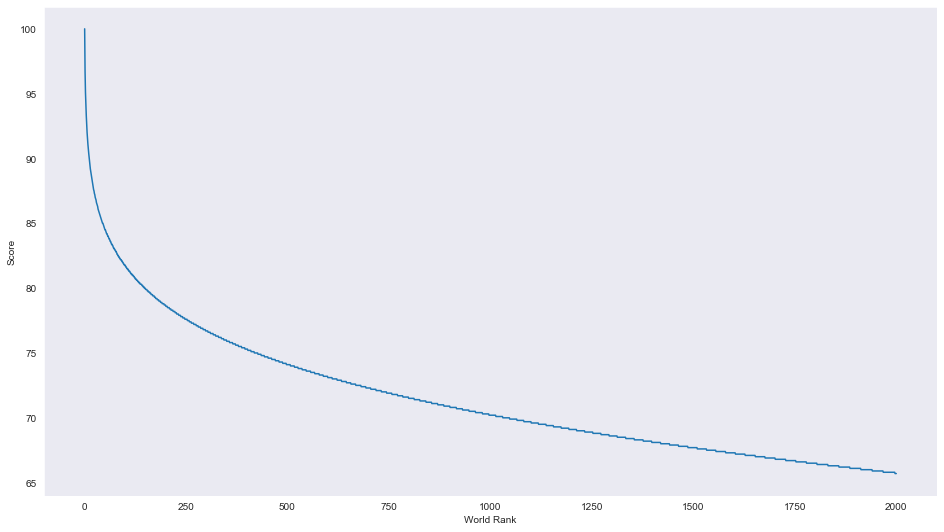

In [17]:
# distribution of score
sns.set_style("dark")
plt.figure(figsize=(16,9))
plt.ylabel("Score")
df.Score.plot()
plt.show()

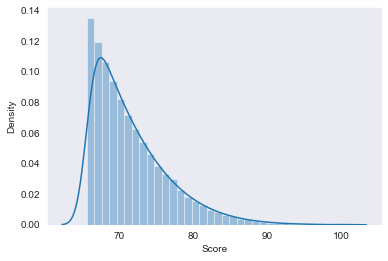

In [18]:
sns.distplot(df.Score)
plt.show()

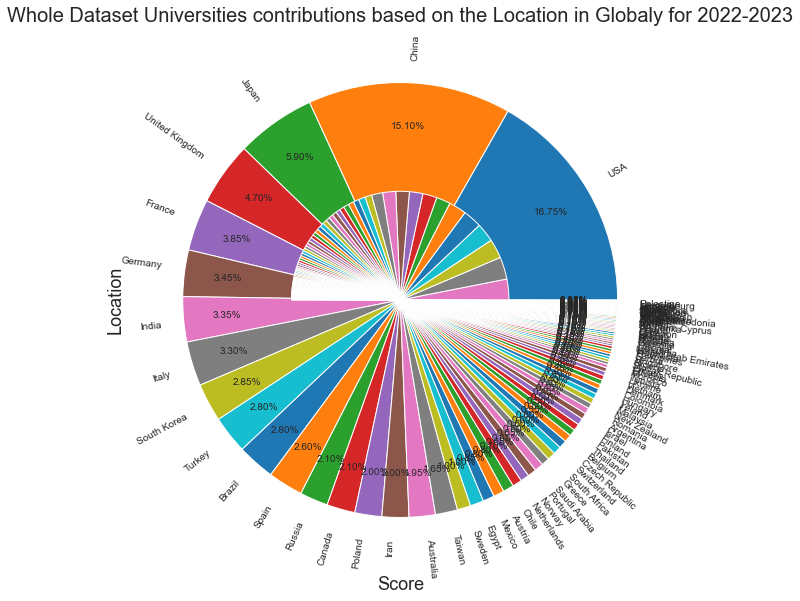

In [53]:
plt.rcParams["figure.figsize"] = (16,10)
plt.title("Whole Dataset Universities contributions based on the Location in Globaly for 2022-2023",size=20)
df.Location.value_counts().plot(kind="pie", autopct="%0.2f%%",rotatelabels=True,wedgeprops={"width":1.5}, pctdistance=.8)
plt.xlabel("Score",size=18)
plt.ylabel("Location",size=18)
plt.show()

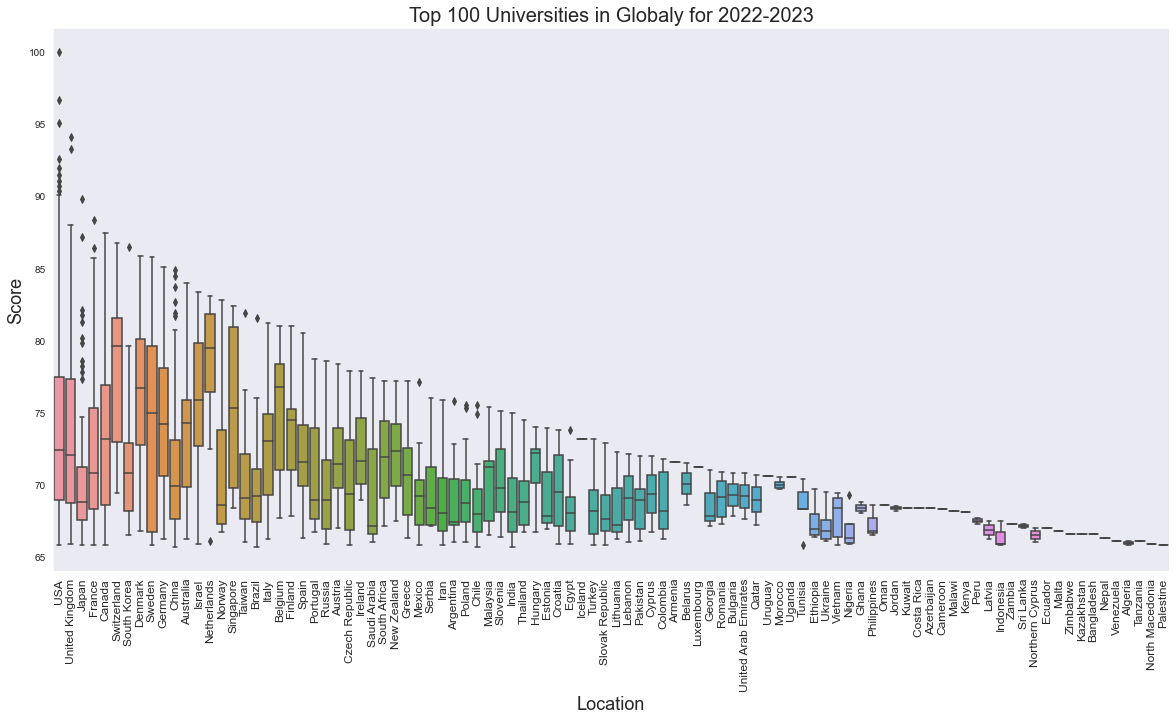

In [48]:
# boxplot of whole data set
sns.boxplot(x=df.Location.values, y=df.Score)
plt.title("Top 100 Universities in Globaly for 2022-2023",size=20)
plt.xlabel("Location",size=18)
plt.ylabel("Score",size=18)
plt.xticks(rotation=90, size=12)
plt.show()

`insight`

- We can say some Universities have **very good score compare to the other one**.
- From this plot, Some outlier to be detected. It is **score value** of universitites.

# --------------------------  Globaly Analysis   ------------------------------------

## 1. World Top 100 Universities  

### Top 100 Universities Based on the Location  

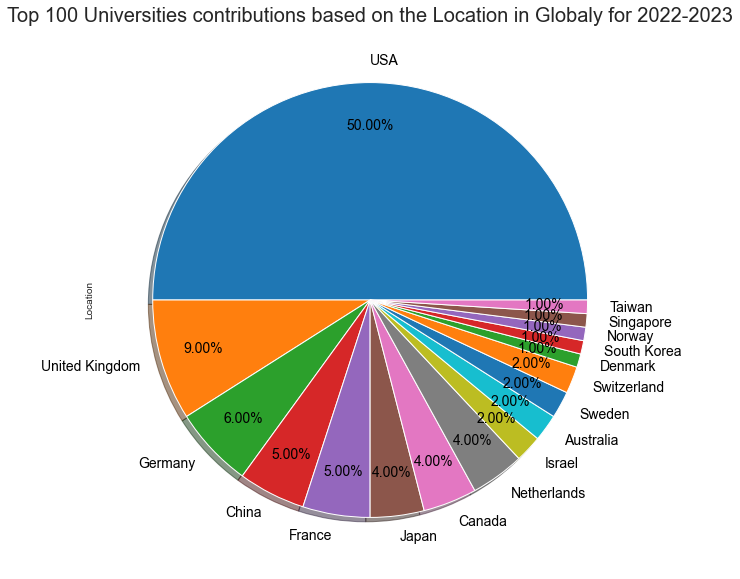

In [54]:
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Top 100 Universities contributions based on the Location in Globaly for 2022-2023",size=20)
df.Location.head(100).value_counts().plot.pie(autopct="%0.2f%%" ,shadow=True ,textprops={"color":"k",'fontsize': 14}, pctdistance=0.8)
plt.show()
# , explode=[x for x in np.random.uniform(0.0001, 0.055,size=100)],   pctdistance=0.8, textprops={"color":"k",'fontsize': 14}

`Insight`

- **USA** hold the **50%** contribution in the TOP 100 Universities. So we can say that the **Education system of USA be very good**. So most student want to study in **USA**. 
- After **USA**, **UK** is very good place to Study. It hold the **Second postion** with **9%** in the  top 100 Universites.

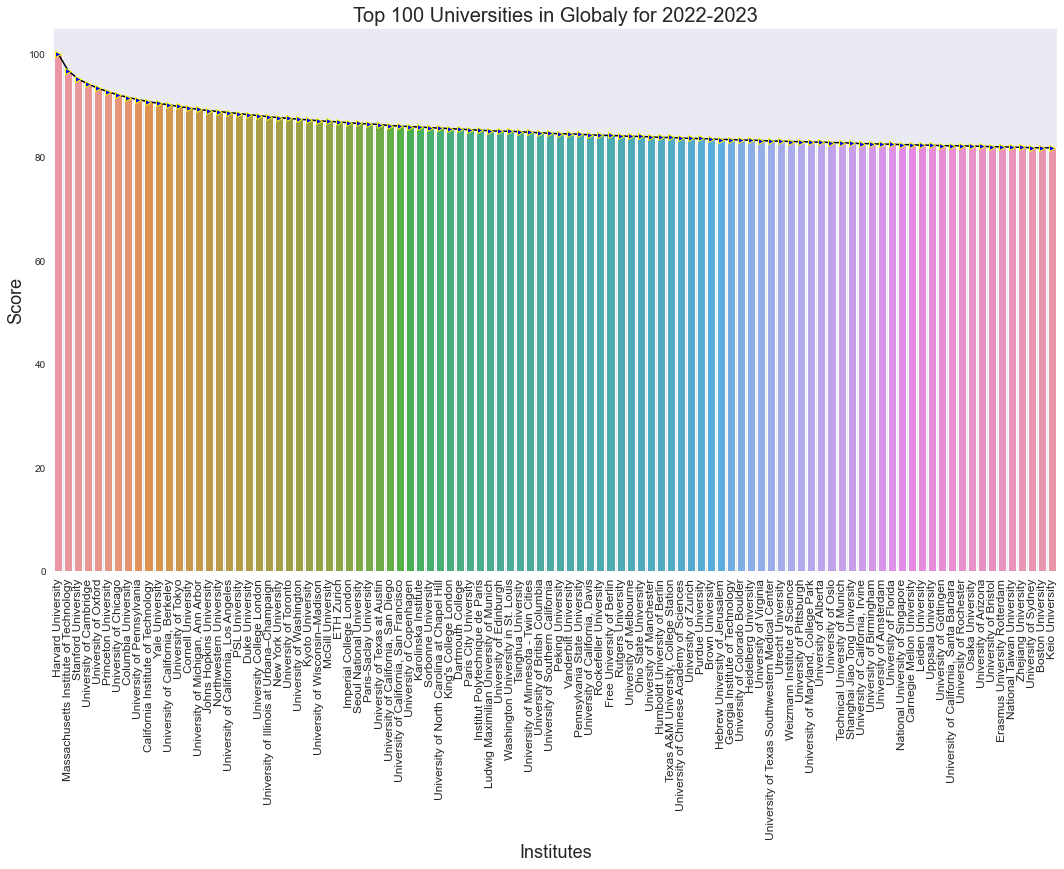

Mean Score of Top 100 Universities Globally is :  85.62199999999999


In [21]:
# Bar chart of top 100 Universities
plt.figure(figsize=(18,10))
plt.plot(df.Institution.head(100),df.Score.head(100),marker=">",mfc="b",mec="yellow",c="k")
sns.barplot(x=df.Institution.head(100),y=df.Score.head(100))
plt.title("Top 100 Universities in Globaly for 2022-2023",size=20)
plt.xlabel("Institutes",size=18)
plt.ylabel("Score",size=18)
plt.xticks(rotation=90, size=12)
plt.show()
print("Mean Score of Top 100 Universities Globally is : ", df.Score.head(100).mean())

`Insight`

- Distribution of the **Top 100 Universities is  85.63**. We can say Top 100 University holds the socre between 80 to 100 score. 
- So these Universities are best for the Study in Globally. 

In [22]:
df

,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
World Rank,,,,,,,,
1,Harvard University,USA,1,1,1,1,1,100.0
2,Massachusetts Institute of Technology,USA,2,4,12,2,7,96.7
3,Stanford University,USA,3,11,4,3,2,95.1
4,University of Cambridge,United Kingdom,1,3,25,4,10,94.1
5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...
1996,Bharathidasan University,India,66,-,-,-,1921,65.8
1997,Federal University of Maranhão,Brazil,56,-,-,-,1923,65.7
1998,Jiangxi University of Finance and Economics,China,302,-,797,-,1948,65.7


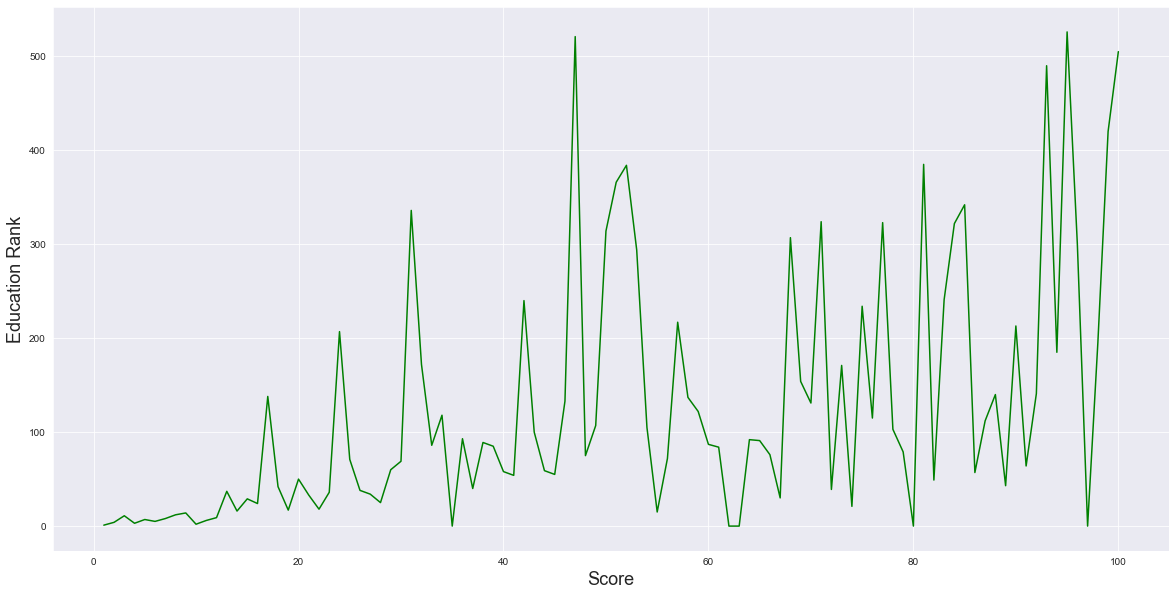

In [23]:
df["Education Rank"].replace("-", 0).astype(int).head(100).plot(color="green") 
plt.xlabel("Score",size=18)
plt.ylabel("Education Rank",size=18)
plt.grid()
plt.show()

`insight`

- **Lower value in the Education Rank** show the **Good University score**

## 2. World Top 10 Universities  

### World  Universities based on the Score Value

In [24]:
# Top 10 universities 
display(df.Institution.head(10))

World Rank
1                        Harvard University
2     Massachusetts Institute of Technology
3                       Stanford University
4                   University of Cambridge
5                      University of Oxford
6                      Princeton University
7                     University of Chicago
8                       Columbia University
9                University of Pennsylvania
10       California Institute of Technology
Name: Institution, dtype: object

In [25]:
# bottom 10 Universites
display(df.Institution.tail(10)[::-1]) 

World Rank
2000    National Institute of Mental Health and Neuros...
1999                               University of Tarapacá
1998          Jiangxi University of Finance and Economics
1997                       Federal University of Maranhão
1996                             Bharathidasan University
1995                          Kanazawa Medical University
1994                             Hanoi Medical University
1993        University of Djillali Liabès, Sidi Bel-Abbès
1992                          University of North Florida
1991                                   Giresun University
Name: Institution, dtype: object

In [26]:

df.Score.min()

65.7

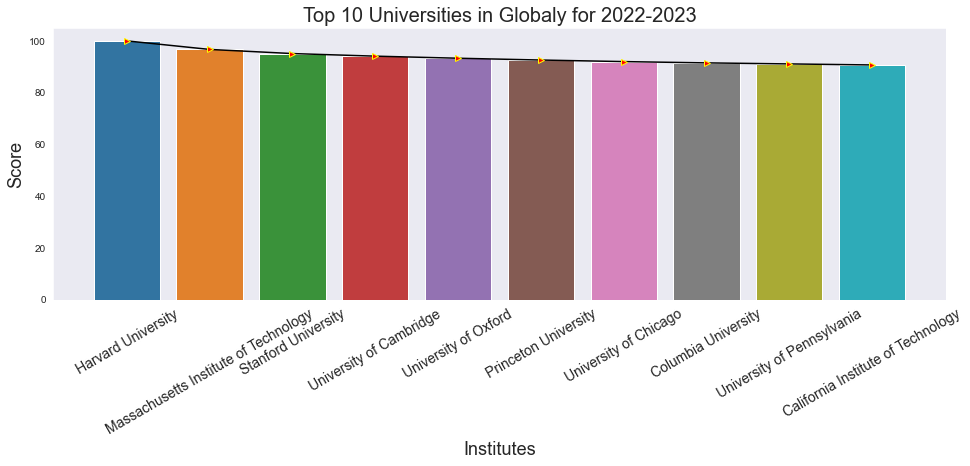

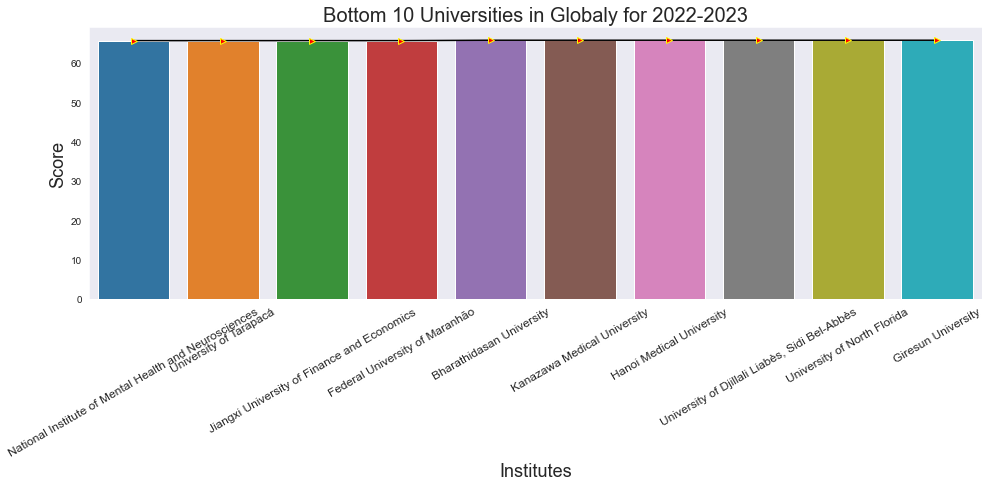

In [27]:
# using figure class
def dual_plot(x1,x2, y1, y2):
  
    plt.figure(figsize=(16,5))
    # bar plot 1 
    sns.barplot(x1, y1)
    plt.plot(x1, y1,marker=">",mfc="r",mec="yellow",c="k")
    plt.title("Top 10 Universities in Globaly for 2022-2023",size=20)
    plt.xlabel("Institutes",size=18)
    plt.ylabel("Score",size=18)
    plt.xticks(rotation=30, size=14)
    plt.show()    
    
    # bar plot 2 
    
    plt.figure(figsize=(16,5))
    plt.plot(x2, y2,marker=">",mfc="r",mec="yellow",c="k")
    sns.barplot(x2, y2)
    plt.title("Bottom 10 Universities in Globaly for 2022-2023",size=20)
    plt.xlabel("Institutes",size=18)
    plt.ylabel("Score",size=18)
    plt.xticks(rotation=30, size=12)
    plt.show()

dual_plot(x1=df.Institution.head(10),x2=df.Institution.tail(10)[::-1], y1=df.Score.head(10), y2=df.Score.tail(10)[::-1])

`Insight`

#### Top 10 Universities in the World to Study across Globe

- 1                        Harvard University
- 2     Massachusetts Institute of Technology
- 3                       Stanford University
- 4                   University of Cambridge
- 5                      University of Oxford
- 6                      Princeton University
- 7                     University of Chicago
- 8                       Columbia University
- 9                University of Pennsylvania
- 10       California Institute of Technology

#### Bottom 10 Universities in the World to Study across Globe

- 1 National Institute of Mental Health and Neuros...
- 2                               University of Tarapacá
- 3          Jiangxi University of Finance and Economics
- 4                       Federal University of Maranhão
- 5                             Bharathidasan University
- 6                           Kanazawa Medical University
- 7                             Hanoi Medical University
- 8        University of Djillali Liabès, Sidi Bel-Abbès
- 9                          University of North Florida
- 10                                   Giresun University


### Top 10 Universities Contribution 

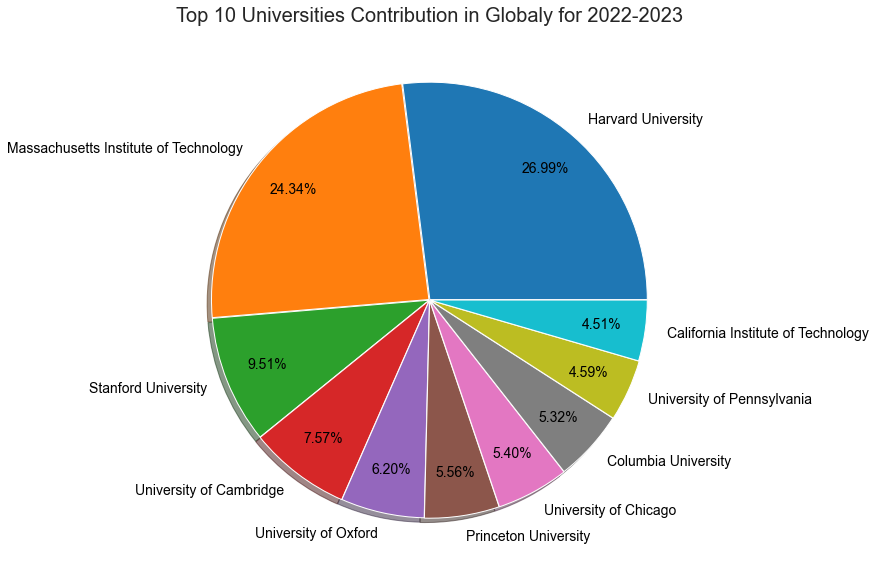

In [55]:
sns.set_style("dark")
plt.figure(figsize=(10,10))
plt.title("Top 10 Universities Contribution in Globaly for 2022-2023",size=20)
plt.pie(df.Location.value_counts(ascending=False).head(10), autopct="%0.2f%%" ,shadow=True , explode=[x for x in np.random.uniform(0.001, 0.005,size=10)],   pctdistance=0.8,labels=df.Institution.head(10), textprops={"color":"k",'fontsize': 14})
plt.show()

`insight`

- Top rank hold by the **Harvard University**. It lead the more percentage in the unversity rank which is **26.99**.
- Both **Harvard University** and **Massachusetts Institute of Technology University** hold the **50%** contribution in the world's education.

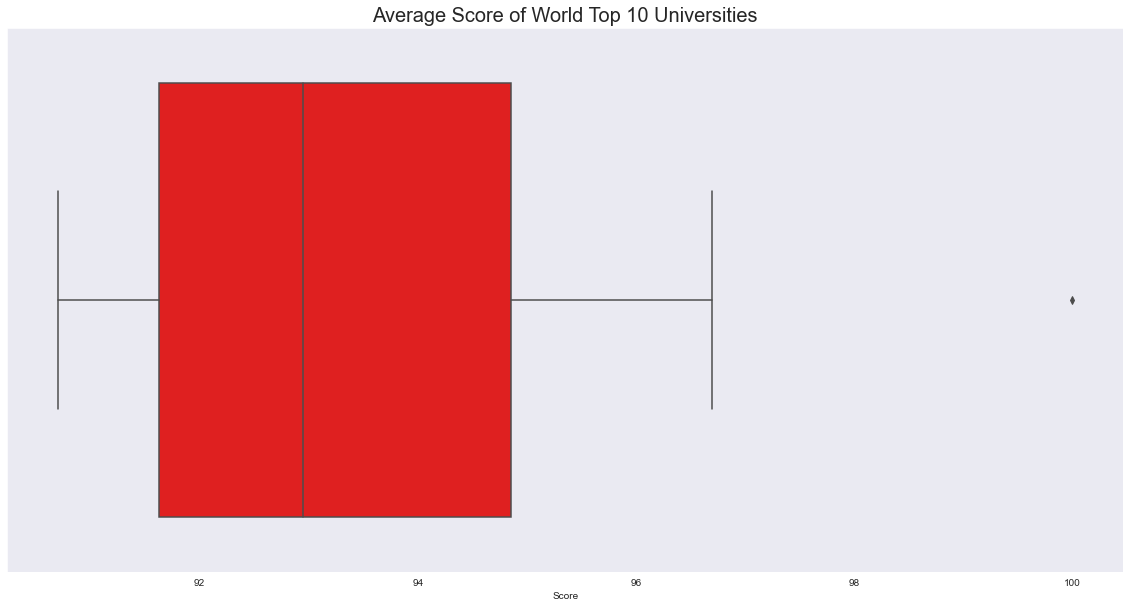

93.71000000000001


In [29]:
plt.title("Average Score of World Top 10 Universities",size=20)
sns.boxplot(df.Score.head(10), color="r")
plt.show()
print(df.Score.head(10).mean())

`Insight`

- The Distribution of score is **decreasing**. Hence we can say that  Highesht rank University lead to the low score.
- Top Universities leads highest scores.
- **Average Score** of the Top 10 Unviersities is **93.71**.


In [30]:
df.columns

Index(['Institution', 'Location', 'National Rank', 'Education Rank',
       'Employability Rank', 'Faculty Rank', 'Research Rank', 'Score'],
      dtype='object')

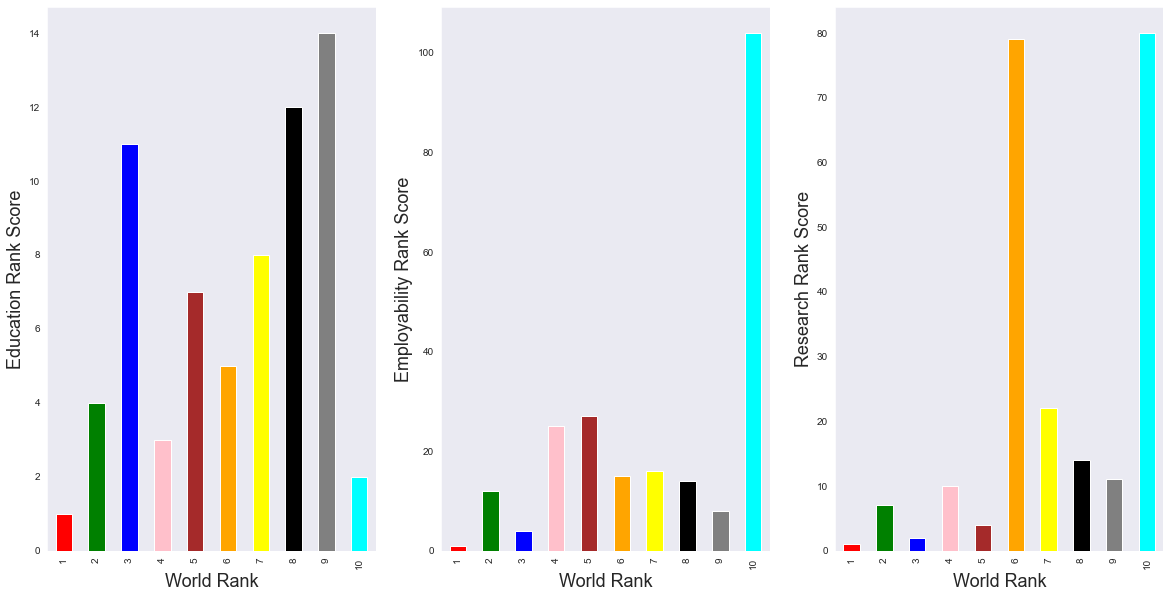

In [31]:

plt.subplot(131)
# Education Rank
df["Education Rank"] = df["Education Rank"].replace("-", 0).astype(int)
df["Education Rank"].head(10).plot(kind="bar", color=["r","g","blue","pink","brown","orange","yellow","black","grey","cyan"])
plt.xlabel("World Rank",size=18)
plt.ylabel("Education Rank Score",size=18)

plt.subplot(132)
#Employebility rank
df["Employability Rank"] = df["Employability Rank"].replace("-", 0).astype(int)
df["Employability Rank"].head(10).plot(kind="bar",color=["r","g","blue","pink","brown","orange","yellow","black","grey","cyan"])
plt.xlabel("World Rank",size=18)
plt.ylabel("Employability Rank Score",size=18)

plt.subplot(133)
# Research Rank
df["Research Rank"] = df["Research Rank"].replace("-", 0).astype(int)
df["Research Rank"].head(10).plot(kind="bar", color=["r","g","blue","pink","brown","orange","yellow","black","grey","cyan"])
plt.xlabel("World Rank",size=18)
plt.ylabel("Research Rank Score",size=18)
plt.show()

`Insight`

- From the plot, **1st,2nd, 4rd Rank Universities** best for **all parameters**.
- World **Top 5** Universities Best in case of **Research Rank**.
- World **Top 9** Universities best in case of **Employability Rank**.
- In case of **Education Rank   1st, 2nd, 4th, 10th are best** 


Note : low score means high value of the Universities/Institutions 

<AxesSubplot:>

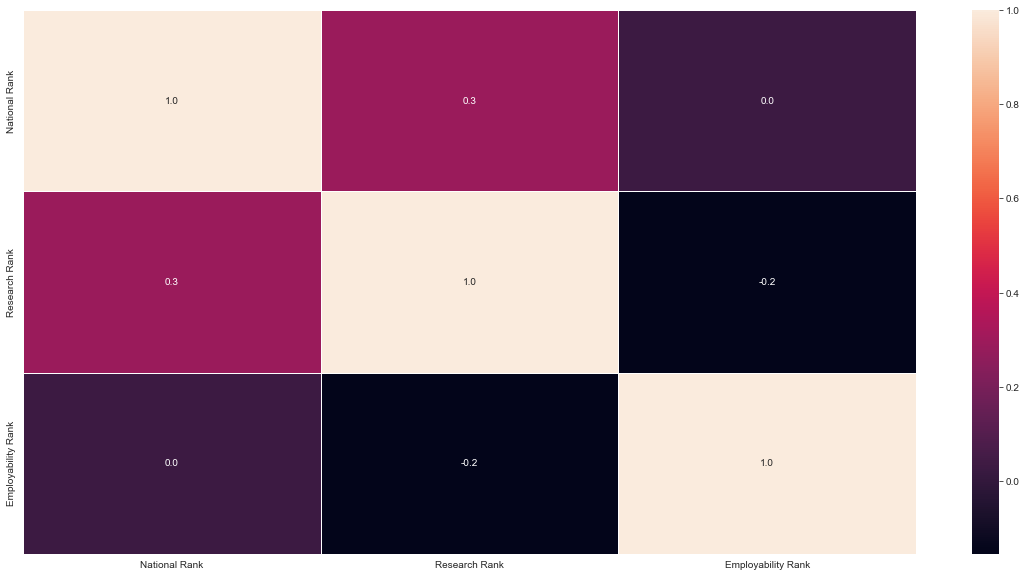

In [64]:
sns.heatmap(df[["National Rank", "Research Rank",'Employability Rank']].corr(), annot=True,linewidths=0.5,linecolor="white", fmt= '.1f')

`Insight`

- From Heatmap we can say Research rank is negatively correlated.

# India (Country Specific)

In [32]:
df.head()

,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
World Rank,,,,,,,,
1,Harvard University,USA,1,1,1,1,1,100.0
2,Massachusetts Institute of Technology,USA,2,4,12,2,7,96.7
3,Stanford University,USA,3,11,4,3,2,95.1
4,University of Cambridge,United Kingdom,1,3,25,4,10,94.1
5,University of Oxford,United Kingdom,2,7,27,9,4,93.3


In [33]:
india_un = df[df["Location"]=="India"]

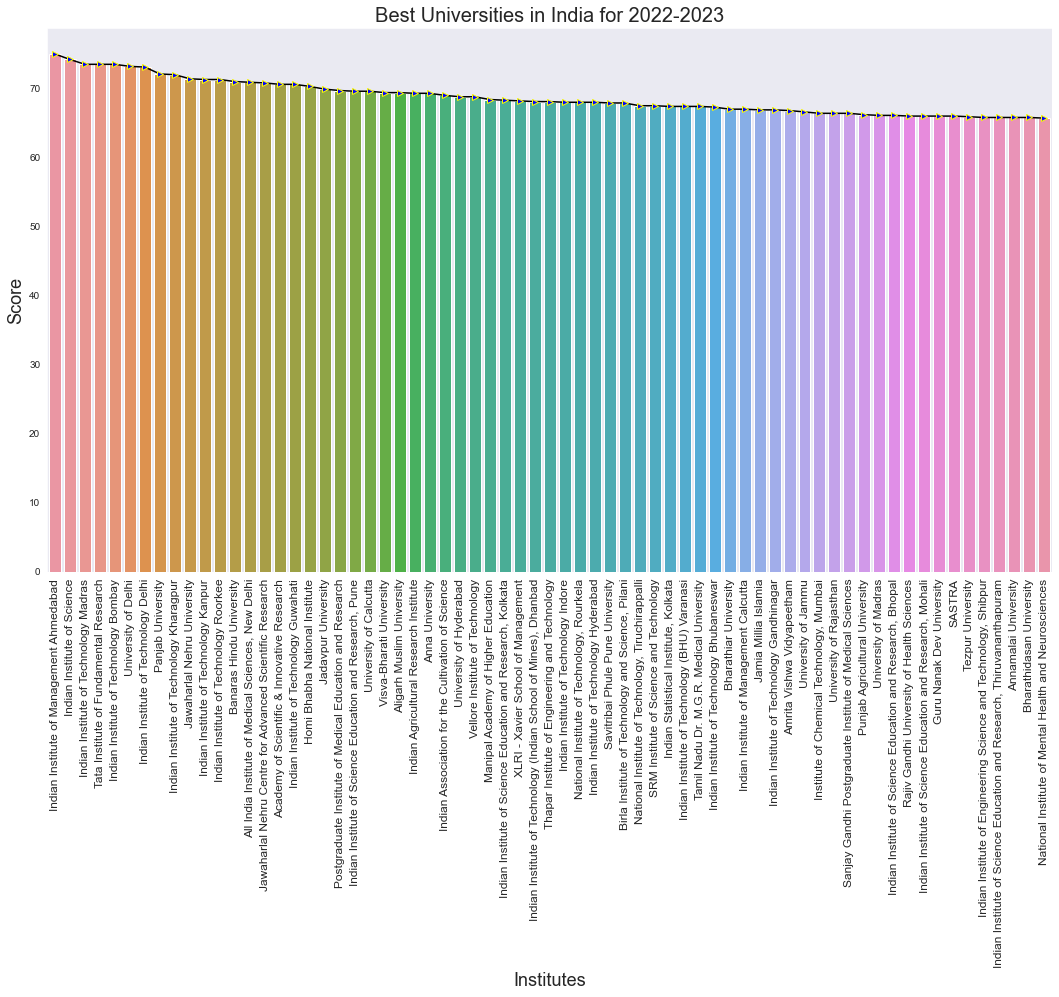

In [51]:

plt.figure(figsize=(18,10))
plt.plot(india_un.Institution.head(67),india_un.Score.head(67),marker=">",mfc="b",mec="yellow",c="k")
sns.barplot(x=india_un.Institution.head(67),y=india_un.Score.head(67))
plt.title("Best Universities in India for 2022-2023",size=20)
plt.xlabel("Institutes",size=18)
plt.ylabel("Score",size=18)
plt.xticks(rotation=90, size=12)
plt.show()

### Top 10 Universities in India

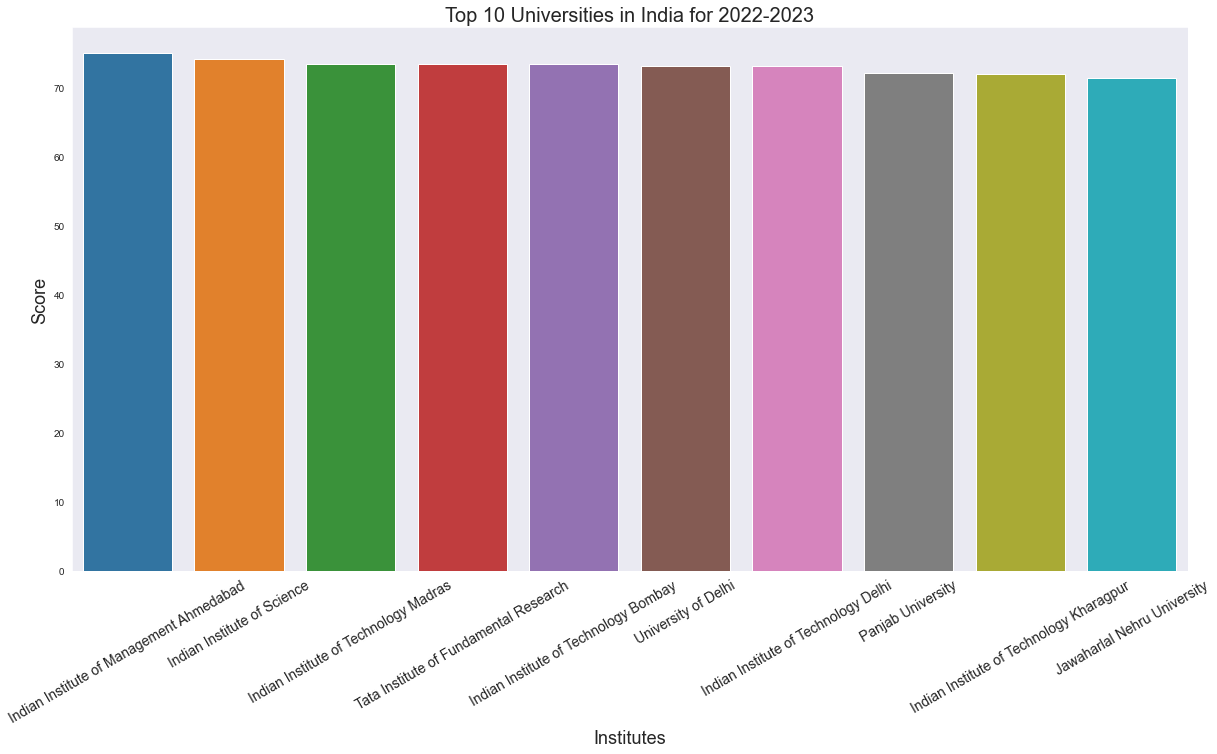

In [35]:
plt.title("Top 10 Universities in India for 2022-2023",size=20)
sns.barplot( x=india_un.Institution.head(10),y=india_un.Score.head(10))
plt.xlabel("Institutes",size=18)
plt.ylabel("Score",size=18)
plt.xticks(rotation=30, size=14)
plt.show()

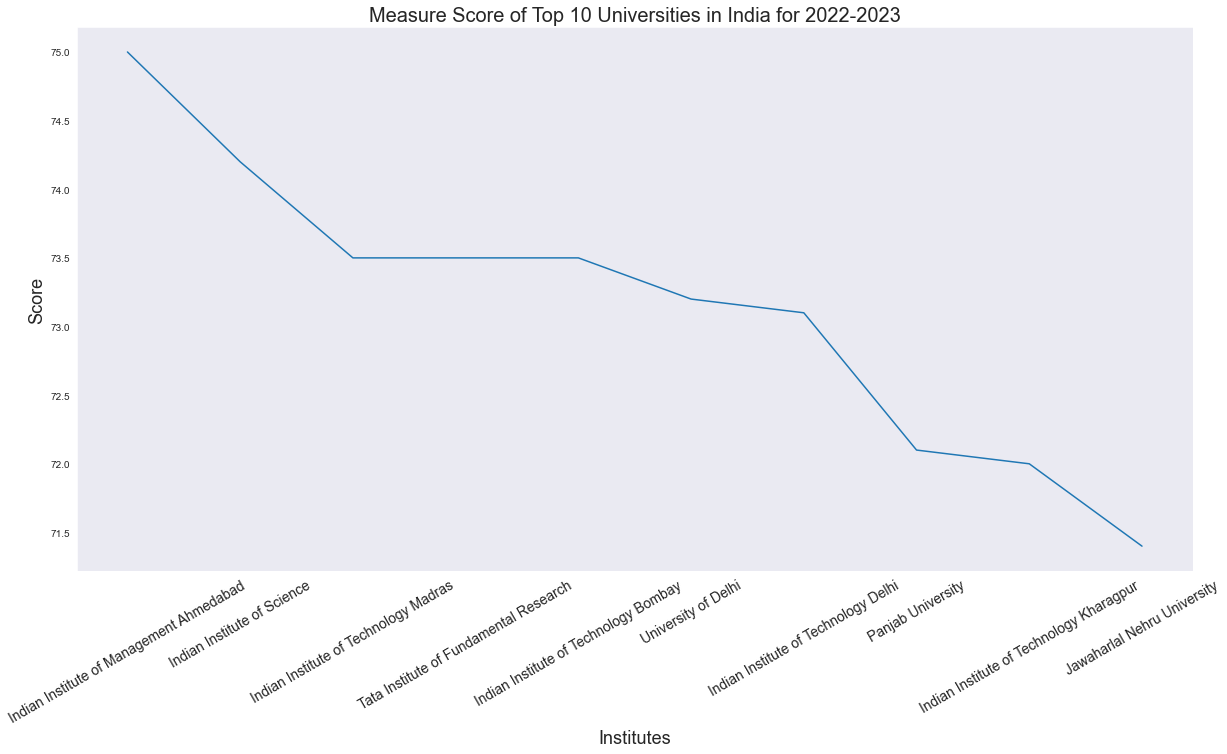

In [36]:
sns.lineplot(india_un.Institution.head(10), india_un.Score.head(10))
plt.title("Measure Score of Top 10 Universities in India for 2022-2023",size=20)
plt.xlabel("Institutes",size=18)
plt.ylabel("Score",size=18)
plt.xticks(rotation=30, size=14)
plt.show()

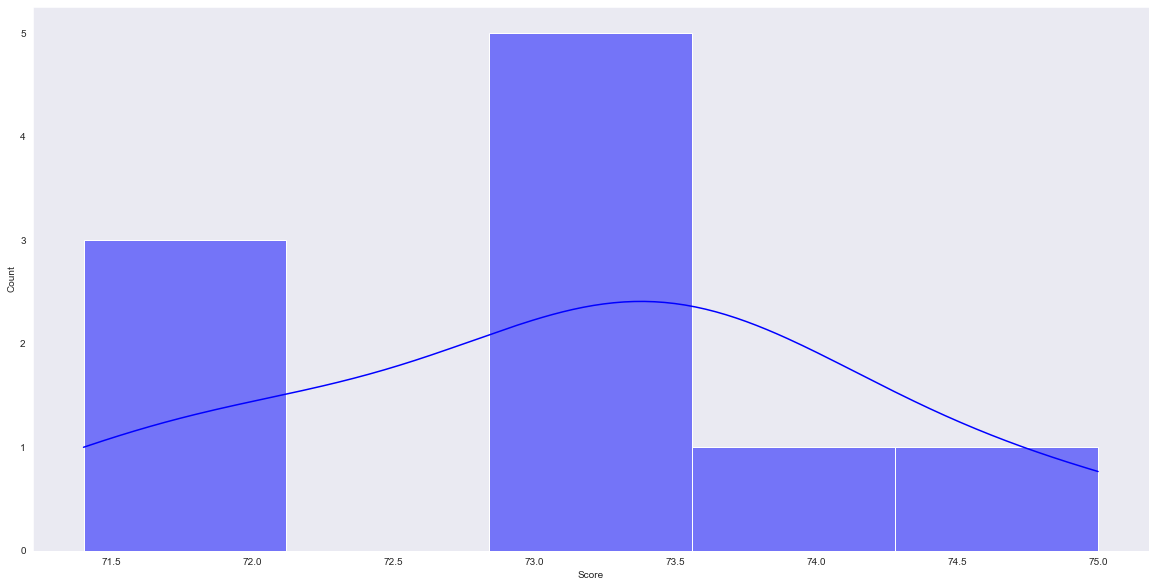

In [37]:
# distribution of the data
sns.histplot( india_un.Score.head(10),kde=True, color="blue")
plt.show()

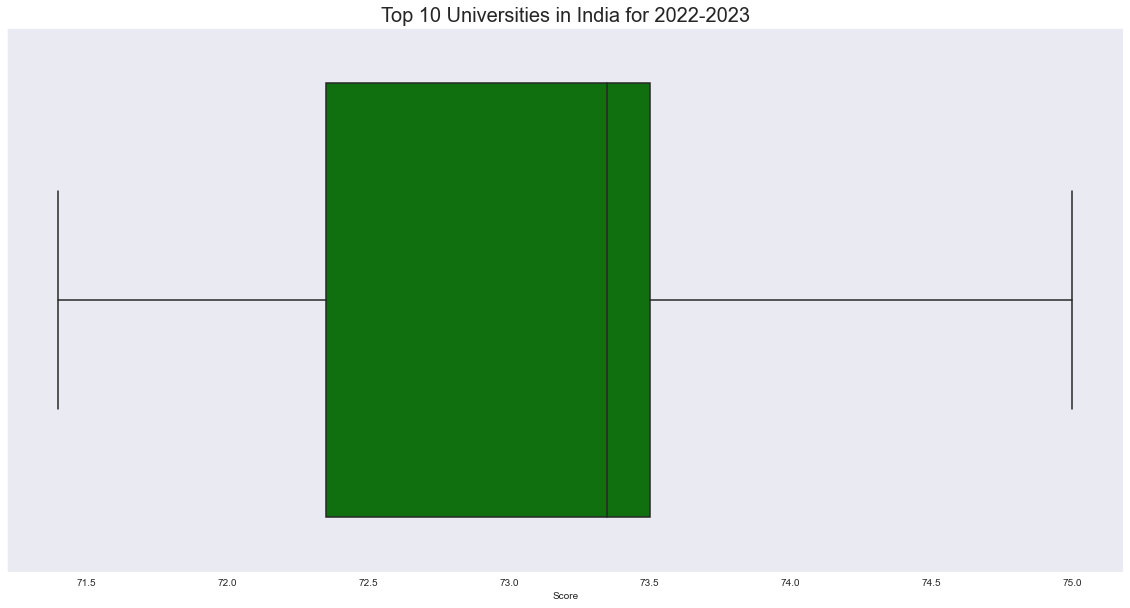

73.15


In [38]:
plt.title("Top 10 Universities in India for 2022-2023",size=20)
sns.boxplot(india_un.Score.head(10), color="green")
plt.show()
print(india_un.Score.head(10).mean())

In [39]:
np.percentile(india_un.Score.head(10), [25, 50,100])

array([72.35, 73.35, 75.  ])

`Insight`

- In the histogram that we can say that the more weightage of the Universities score on the **right side [73.35 - 75.00 ]** compare to  the left side. Which mean **more universities have best score than average**.

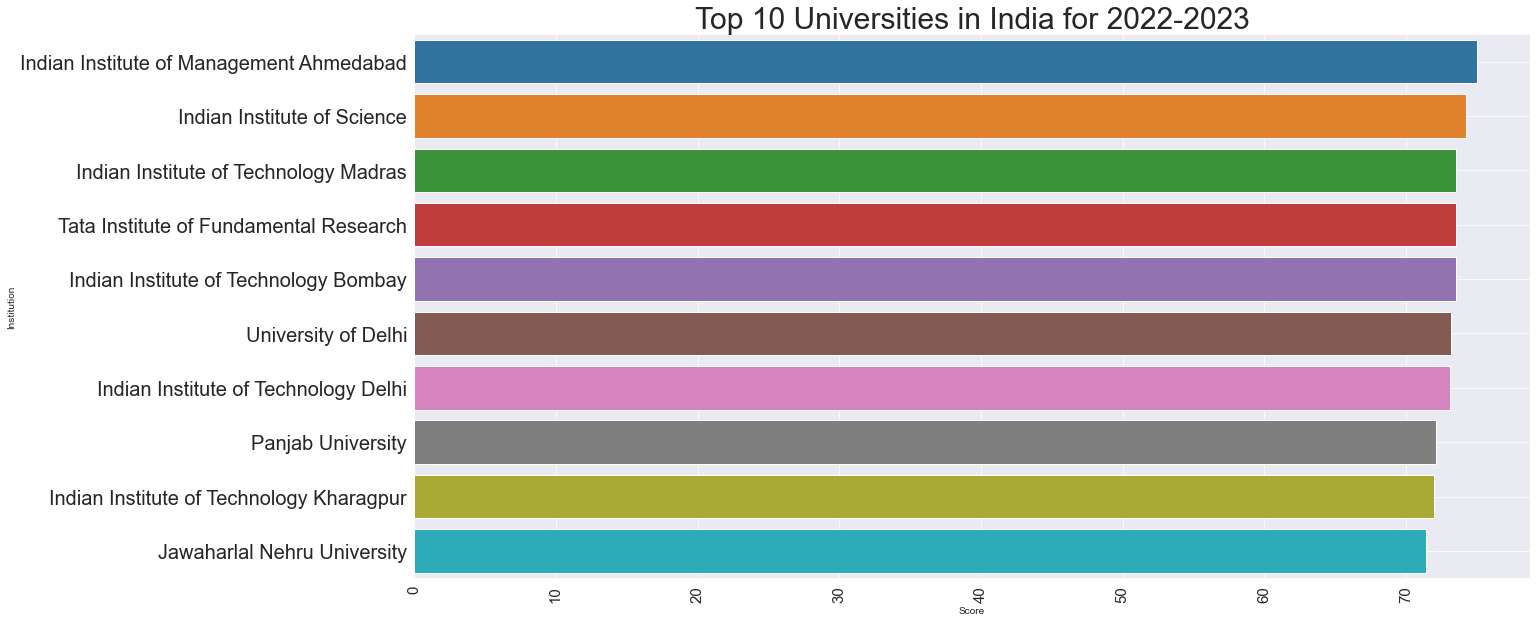

In [40]:
plt.title("Top 10 Universities in India for 2022-2023",size=30)
sns.barplot(india_un.Score.head(10),india_un.Institution.head(10), orient="h")
plt.xticks(rotation=90,size=15)
plt.yticks(size=20)
plt.grid()
plt.show()

`Insight`

- **IIM Ahmedabad** leads the **Inida's best University/Institues**. 
- After that **IIM Ahmedabad**, **IIS** comes at **2nd Position**.
- All have same score So we can say **All are the best Universities/Insititutions** in **India** for Study.

## Top 10 Universities based on the Research Rank

In [41]:
# impute the 0 in place of "-"
# convert object column to numeric data of Research rank
 

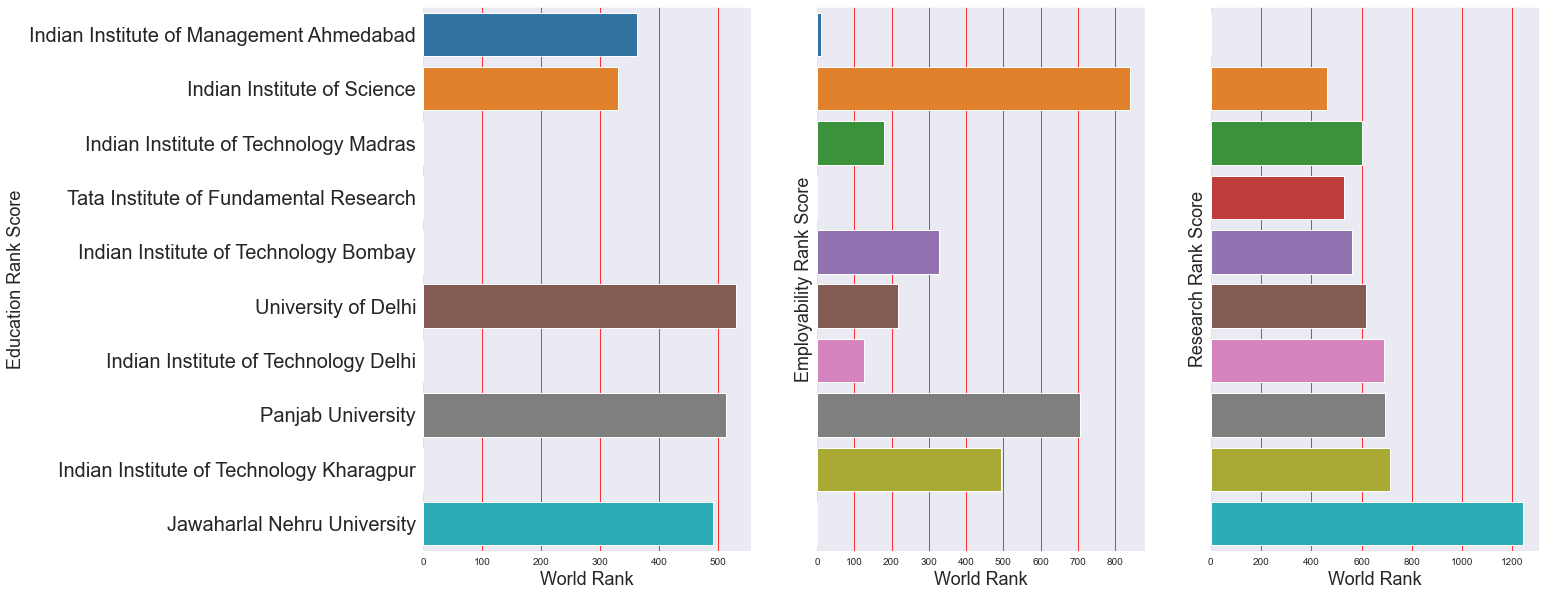

In [42]:
plt.subplot(131)
# Education Rank
india_un["Education Rank"] = india_un["Education Rank"].replace("-", 0).astype(int)
sns.barplot(india_un["Education Rank"].head(10),  india_un.Institution.head(10), orient="h")
plt.xlabel("World Rank",size=18)
plt.ylabel("Education Rank Score",size=18)
plt.yticks(rotation=0, size=20)
plt.grid(color="r",axis="x")

plt.subplot(132)
#Employebility rank
india_un["Employability Rank"] = india_un["Employability Rank"].replace("-", 0).astype(int)
sns.barplot(india_un["Employability Rank"].head(10),  india_un.Institution.head(10),orient="h")
plt.xlabel("World Rank",size=18)
plt.ylabel("Employability Rank Score",size=18)
plt.yticks([] , rotation=0, size=20)
plt.grid(color="r",axis="x")

plt.subplot(133)
# Research Rank
india_un["Research Rank"] = india_un["Research Rank"].replace("-", 0).astype(int)
sns.barplot(india_un["Research Rank"].head(10),  india_un.Institution.head(10), orient="h")
plt.xlabel("World Rank",size=18)
plt.ylabel("Research Rank Score",size=18)
plt.yticks([],rotation=0, size=20)
plt.grid(color="r",axis="x")
plt.show()

`Insight`

- In the Education Rank score have 5 Institutions out of 10. But the **Indian Institute of Science** better in case of Education System.
- **Indian Institute of Management Ahmedabad** best for the employablility rank.
- In Research sector **All are best** except **Jawaharlal Nehru University**.

# Happy Learning